In [1]:
#imports 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
#Posts are preprocessed texts:

#No punctuations, stopwords, URLs
#Lemmatization
#Reconstruct samples to be equal-sized chunks (500 words per sample)

In [3]:
#mbti_500 data
mbti_data = pd.read_csv('MBTI 500.csv')

In [4]:
mbti_data.head()

,posts,type
0,know intj tool use interaction people excuse a...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ
2,preferably p hd low except wew lad video p min...,INTJ
3,drink like wish could drink red wine give head...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ


In [5]:
#observations and characteristics
mbti_data.shape

(106067, 2)

In [6]:
# missing data
mbti_data.isnull().sum()

posts    0
type     0
dtype: int64

In [7]:
# duplicates 
mbti_data.duplicated().sum()

0

In [8]:
mbti_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106067 entries, 0 to 106066
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   posts   106067 non-null  object
 1   type    106067 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


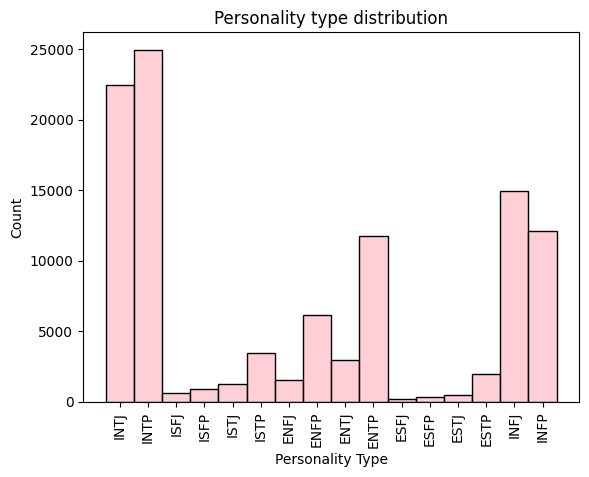

In [9]:
# personality type distribution -- class imbalance 
sns.histplot(mbti_data.type, color='pink')
plt.xlabel('Personality Type')
plt.ylabel('Count')
plt.title('Personality type distribution')
plt.xticks(rotation=90)
plt.show()

In [10]:
mbti_data.type.describe()

count     106067
unique        16
top         INTP
freq       24961
Name: type, dtype: object

In [11]:
mbti_data.posts[0]

'know intj tool use interaction people excuse antisocial truly enlighten mastermind know would count pet peeze something time matter people either whether group people mall never see best friend sit outside conversation jsut listen want interject sit formulate say wait inject argument thought find fascinate sit watch people talk people fascinate sit class watch different people find intrigue dad intj u stand look like line safeway watch people home talk people like think military job people voluntarily go job important show deference endanger live glorify way civilian think pretty ignorant general think military necessary defense mechanism political tactic feel like u specifically invest much money could put money education whatnot though personally sound budget aernative really comment one way base two politician eye year ago come name somewhat important kinda role model nowadays pick keep score individual level mean little vary accord number condition day may score high others low sw

In [12]:
personality_type = mbti_data.type.value_counts()
personality_type

INTP    24961
INTJ    22427
INFJ    14963
INFP    12134
ENTP    11725
ENFP     6167
ISTP     3424
ENTJ     2955
ESTP     1986
ENFJ     1534
ISTJ     1243
ISFP      875
ISFJ      650
ESTJ      482
ESFP      360
ESFJ      181
Name: type, dtype: int64

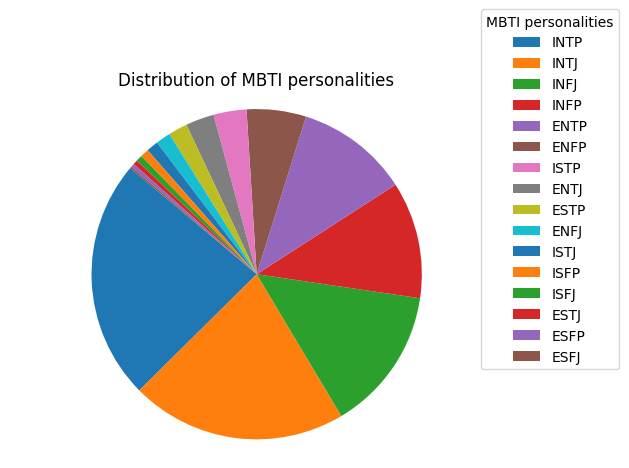

In [13]:
plt.pie(personality_type, labels=None, startangle=140)
plt.axis('equal') 
plt.title('Distribution of MBTI personalities')
legend = plt.legend(labels=personality_type.index, title='MBTI personalities')
legend.set_bbox_to_anchor((1.25, 1.25))
plt.tight_layout()
plt.show()

MBTI classifier has 4 main dimensions:
- IE (introversion vs extraversion)
- NS (intuition vs sensing)
- TF (thinking vs feeling)
- JP (Judging vs perceiving)


In [14]:
# I-N-T-J = 1
# E-S-F-P = 0

In [15]:
mbti_df = mbti_data.copy()

In [16]:
mbti_df['IE'] = mbti_df['type'].str[0]
mbti_df['NS'] = mbti_df['type'].str[1]
mbti_df['TF'] = mbti_df['type'].str[2]
mbti_df['JP'] = mbti_df['type'].str[3]

In [17]:
mbti_df.head()

,posts,type,IE,NS,TF,JP
0,know intj tool use interaction people excuse a...,INTJ,I,N,T,J
1,rap music ehh opp yeah know valid well know fa...,INTJ,I,N,T,J
2,preferably p hd low except wew lad video p min...,INTJ,I,N,T,J
3,drink like wish could drink red wine give head...,INTJ,I,N,T,J
4,space program ah bad deal meing freelance max ...,INTJ,I,N,T,J


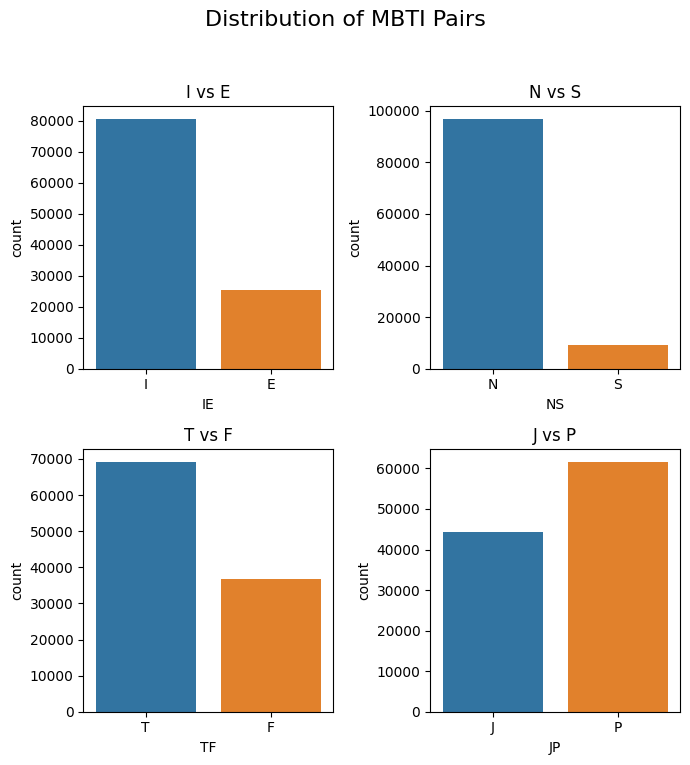

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(7, 8))
fig.suptitle('Distribution of MBTI Pairs', fontsize=16)

sns.countplot(ax=axes[0, 0], data=mbti_df, x='IE')
axes[0, 0].set_title('I vs E')

sns.countplot(ax=axes[0, 1], data=mbti_df, x='NS')
axes[0, 1].set_title('N vs S')

sns.countplot(ax=axes[1, 0], data=mbti_df, x='TF')
axes[1, 0].set_title('T vs F')

sns.countplot(ax=axes[1, 1], data=mbti_df, x='JP')
axes[1, 1].set_title('J vs P')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [19]:
types = ['INFP',
         'INFJ',
         'INTP',
         'INTJ', 
         'ENTP', 
         'ENFP', 
         'ISTP',
         'ISFP',
         'ENTJ', 
         'ISTJ',
         'ENFJ', 
         'ISFJ',
         'ESTP',
         'ESFP',
         'ESFJ',
         'ESTJ']
types_lower = [type.lower() for type in types]
print(types_lower)

['infp', 'infj', 'intp', 'intj', 'entp', 'enfp', 'istp', 'isfp', 'entj', 'istj', 'enfj', 'isfj', 'estp', 'esfp', 'esfj', 'estj']


In [20]:
#removing mbti types from posts 
mbti_data['posts'] = mbti_data['posts'].apply(lambda x: ' '.join([word for word in x.split() if word not in types_lower]))

In [21]:
mbti_data.posts[0]

'know tool use interaction people excuse antisocial truly enlighten mastermind know would count pet peeze something time matter people either whether group people mall never see best friend sit outside conversation jsut listen want interject sit formulate say wait inject argument thought find fascinate sit watch people talk people fascinate sit class watch different people find intrigue dad u stand look like line safeway watch people home talk people like think military job people voluntarily go job important show deference endanger live glorify way civilian think pretty ignorant general think military necessary defense mechanism political tactic feel like u specifically invest much money could put money education whatnot though personally sound budget aernative really comment one way base two politician eye year ago come name somewhat important kinda role model nowadays pick keep score individual level mean little vary accord number condition day may score high others low sweat really

Due to the imbalance in the dataset, certain personality types may have a disproportionately large number of instances. As a result, the words associated with these overrepresented personality types may also appear more frequently in the dataset. However, since these words are not evenly distributed among all personality types, they may not carry much useful information for distinguishing between different types. In other words, these words might not be strong indicators of personality type because they are not spread evenly across the dataset.

This imbalance can lead to challenges when training a machine learning model, as the model may become biased toward the overrepresented personality types and may struggle to accurately predict the underrepresented types. It's important to address this imbalance to ensure fair and accurate predictions across all personality types.

In [22]:
#use TFIDF vectorizer to convert posts into matrix of token counts and then analyse how relavant a word 
# Darshika did using google colab 

In [23]:
temp = pd.read_csv('tfidf_matrix.csv')

In [24]:
temp.head()

,ability,able,absolute,absolutely,abstract,abuse,accept,access,accomplish,accord,...,yeah,year,yep,yes,yesterday,young,youtube,yup,zero,zone
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.059011,...,0.000000,0.023638,0.0,0.000000,0.0,0.0,0.00000,0.065758,0.0,0.000000
1,0.0,0.071614,0.0,0.0,0.0,0.0,0.093034,0.000000,0.0,0.000000,...,0.031473,0.052679,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.040887,0.000000,0.0,0.000000,...,0.000000,0.023152,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.061519
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.040967,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.253479,0.0,0.055472,...,0.000000,0.044442,0.0,0.025774,0.0,0.0,0.05857,0.000000,0.0,0.000000


In [25]:
# after vectorizing ..1500 features for each user post 
print(temp.shape)
print(mbti_data.shape)

(106067, 1500)
(106067, 2)


In [26]:
personality_type = mbti_data['type']

In [27]:
temp.insert(0,'personality_type', personality_type)

In [28]:
temp.head()

,personality_type,ability,able,absolute,absolutely,abstract,abuse,accept,access,accomplish,...,yeah,year,yep,yes,yesterday,young,youtube,yup,zero,zone
0,INTJ,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.023638,0.0,0.000000,0.0,0.0,0.00000,0.065758,0.0,0.000000
1,INTJ,0.0,0.071614,0.0,0.0,0.0,0.0,0.093034,0.000000,0.0,...,0.031473,0.052679,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000
2,INTJ,0.0,0.000000,0.0,0.0,0.0,0.0,0.040887,0.000000,0.0,...,0.000000,0.023152,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.061519
3,INTJ,0.0,0.000000,0.0,0.0,0.0,0.0,0.040967,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000
4,INTJ,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.253479,0.0,...,0.000000,0.044442,0.0,0.025774,0.0,0.0,0.05857,0.000000,0.0,0.000000


In [29]:
temp.shape

(106067, 1501)

In [30]:
temp.to_csv('data.csv', index=False)